In [39]:
%matplotlib inline

In [40]:
import numpy as np
from NSP import NSP
import matplotlib.pyplot as plt

In [41]:
def plot_state_spaces(solution_matrix, fig, lw):
    rows, cols = solution_matrix.shape

    index = int(rows/4)
    for i in range(index):
        ax1 = fig.add_subplot(index, 4, 4*i+1)
        x = solution_matrix[i, :]
        xd = solution_matrix[i+2*index, :]
        ax1.plot(x, xd, lw=lw)
        ax1.set_title(rf'State Space for $x_{i+1}$', fontsize=15)
        ax1.set_xlabel(rf'$x_{i+1}$', fontsize=15)
        ax1.set_ylabel(rf'$\dot x_{i+1}$', fontsize=15)

        ax2 = fig.add_subplot(index, 4, 4*i+2)
        y = solution_matrix[i+index, :]
        yd = solution_matrix[i+index+2*index, :]
        ax2.plot(y, yd, lw=lw)
        ax2.set_title(rf'State Space for $y_{i+1}$', fontsize=15)
        ax2.set_xlabel(rf'$y_{i+1}$', fontsize=15)
        ax2.set_ylabel(rf'$\dot y_{i+1}$', fontsize=15)

        ax3 = fig.add_subplot(index, 4, 4*i+3)
        r = np.sqrt(x**2 + y**2)
        rd = (x*xd + y*yd)/r
        ax3.plot(r, rd, lw=lw)
        ax3.set_title(rf'State Space for $r_{i+1}$', fontsize=15)
        ax3.set_xlabel(rf'$r_{i+1}$', fontsize=15)
        ax3.set_ylabel(rf'$\dot r_{i+1}$', fontsize=15)

        ax4 = fig.add_subplot(index, 4, 4*i+4)
        theta = np.arctan2(x, -y)
        thetad = (x*yd - y*xd)/(y**2+x**2)
        ax4.plot(theta, thetad, lw=lw)
        ax4.set_title(rf'State Space for $\theta_{i+1}$', fontsize=15)
        ax4.set_xlabel(rf'$\theta_{i+1}$', fontsize=15)
        ax4.set_ylabel(rf'$\dot\theta_{i+1}$', fontsize=15)

        fig.tight_layout()

In [42]:
N = 3
M_vec = np.zeros(N) + 10
K_vec = np.zeros(N) + 500
L_vec = np.zeros(N) + 1
spring_pendulum = NSP(M_vec, K_vec, L_vec)

x_0 = [i for i in range(1, N+1)]
y_0=[-i for i in range(1, N+1)] 
x_dot_0 = np.zeros(N) + 5
y_dot_0 = np.zeros(N) + 0.5
t_pts = np.arange(0, 100, 0.001)

solution = spring_pendulum.solve_ode(x_0, y_0, x_dot_0, y_dot_0, t_pts)


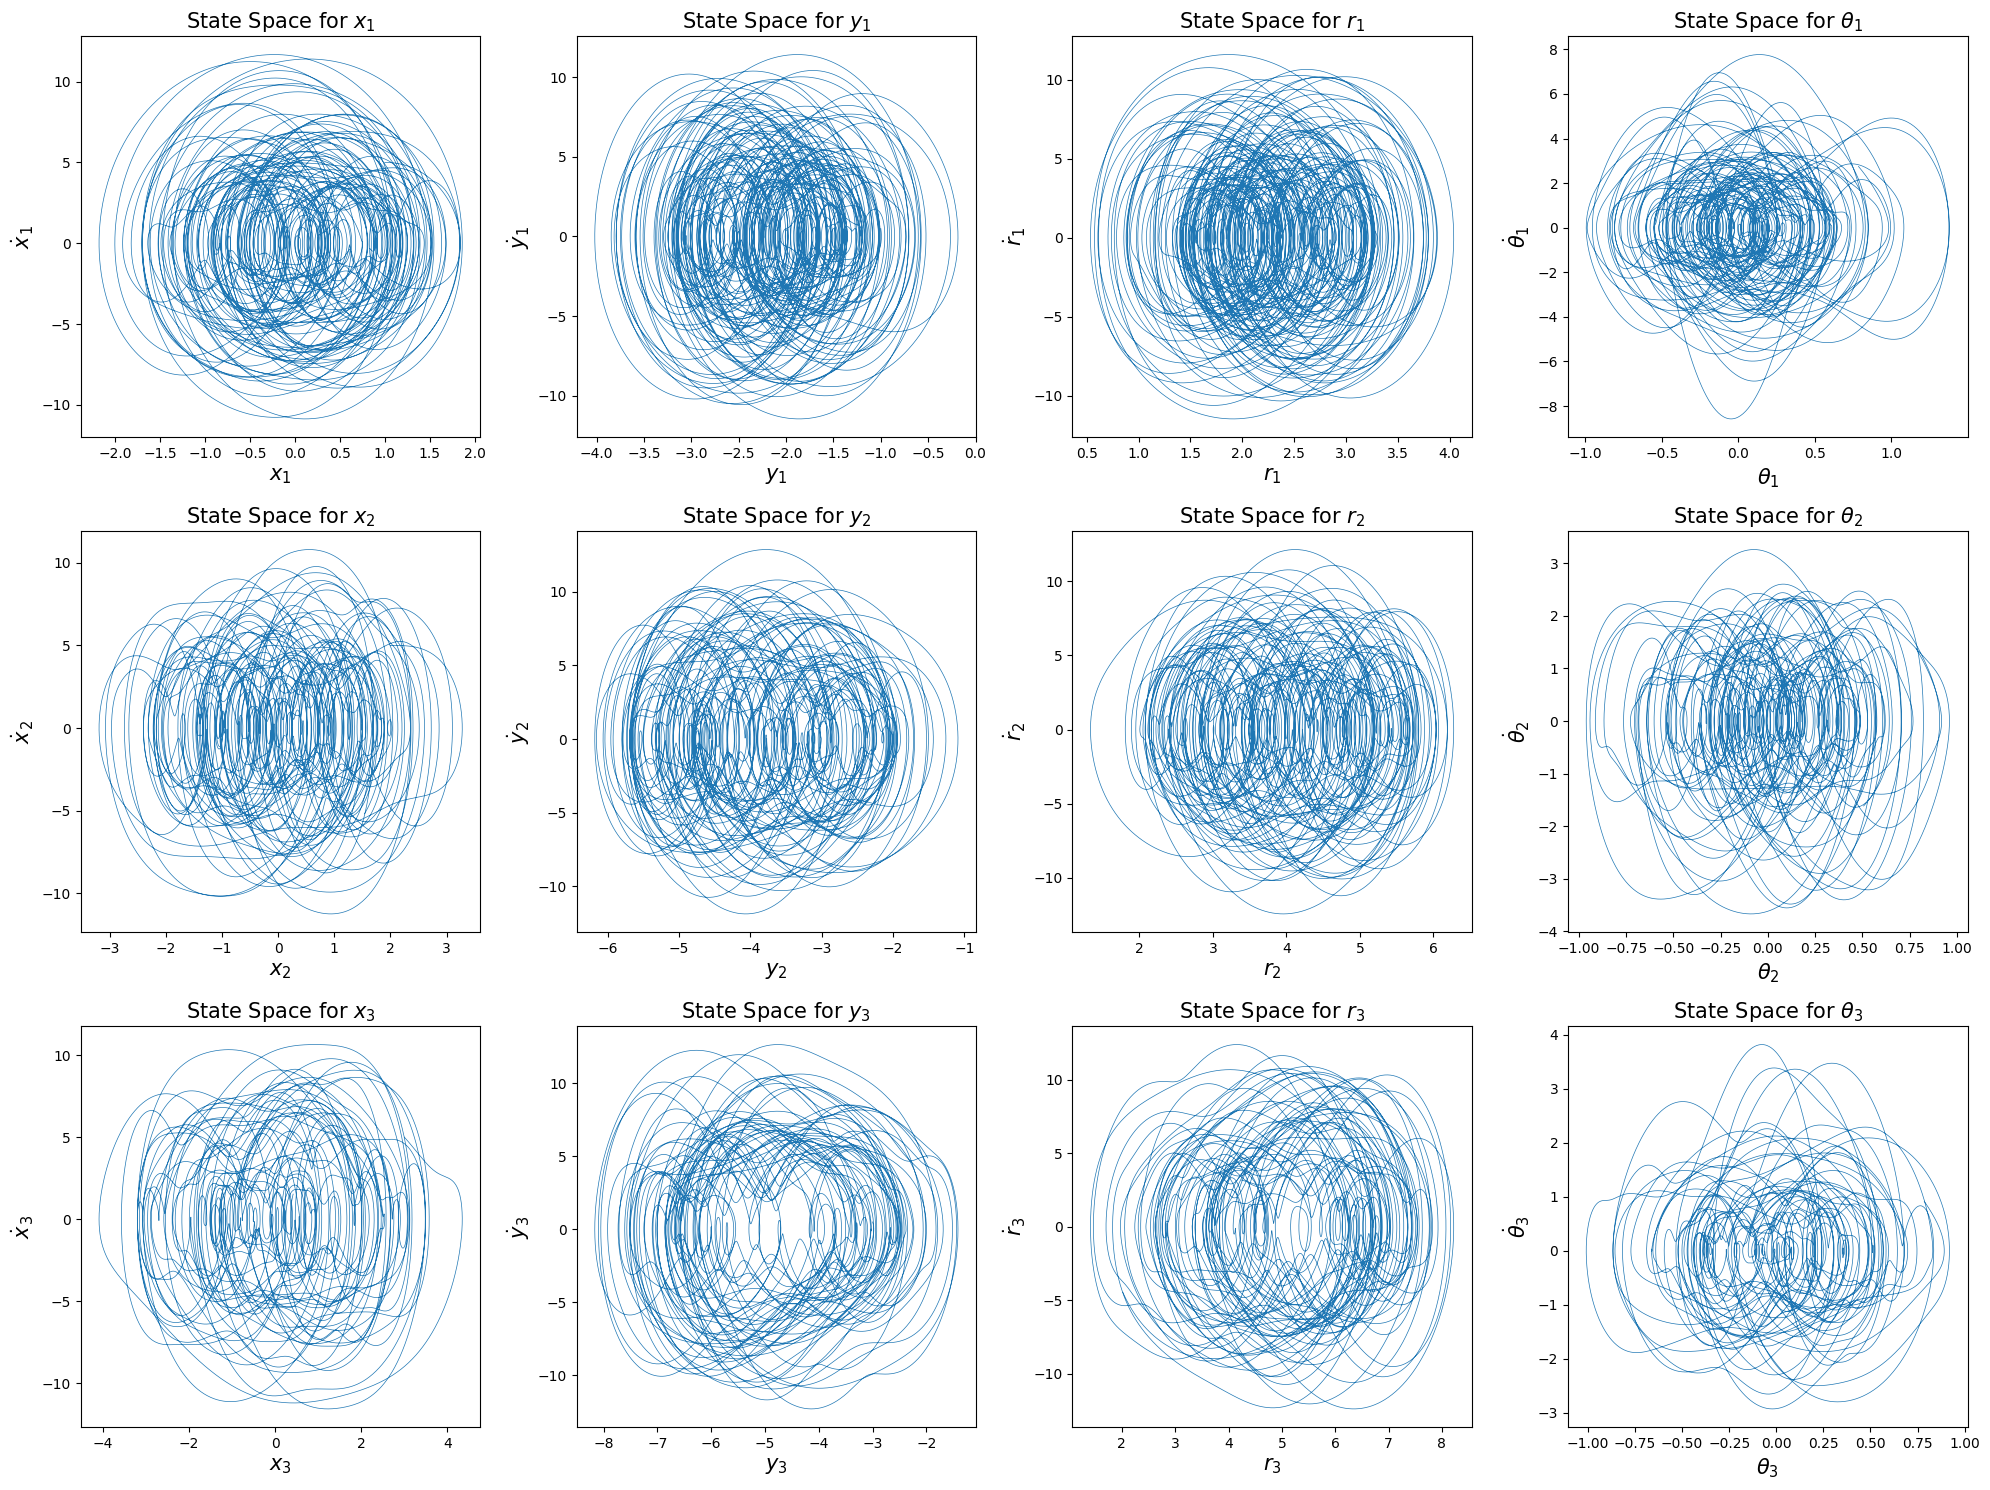

In [45]:
fig = plt.figure(figsize=(20, 15))

plot_state_spaces(solution, fig, 0.5)

fig.savefig("three-spring-pendulum-diff-ic.png", bbox_inches='tight')